In [ ]:
import os, cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm

# base paths
base_dir = "../data/classification_data"
train_dir = os.path.join(base_dir, "train_data")
val_dir   = os.path.join(base_dir, "val_data")
test_dir  = os.path.join(base_dir, "test_data")

print("Train classes:", len(os.listdir(train_dir)))
print("Validation classes:", len(os.listdir(val_dir)))
print("Test classes:", len(os.listdir(test_dir)))


Train classes: 4000
Validation classes: 4000
Test classes: 4000


In [2]:
IMG_SIZE = (160, 160)

def load_and_preprocess(img_path):
    """Load image, resize, normalize to [0,1]."""
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, IMG_SIZE)
    img = img / 255.0
    return img

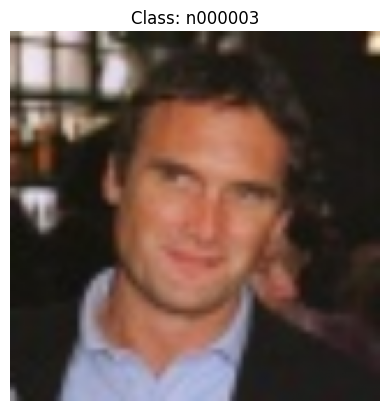

In [3]:
sample_class = os.listdir(train_dir)[0]
sample_img_path = os.path.join(train_dir, sample_class,
                               os.listdir(os.path.join(train_dir, sample_class))[0])

img = load_and_preprocess(sample_img_path)
plt.imshow(img)
plt.title(f"Class: {sample_class}")
plt.axis('off')
plt.show()

In [4]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 306121 images belonging to 4000 classes.
Found 74517 images belonging to 4000 classes.


In [5]:
pairs_file = "../data/verification_pairs_val.txt"
pairs = np.loadtxt(pairs_file, dtype=str)
print("Example verification pair:")
print(pairs[0])

Example verification pair:
['verification_data/00041961.jpg' 'verification_data/00044353.jpg' '0']


In [6]:
batch_imgs, batch_labels = next(train_gen)
np.save("../output/sample_train_imgs.npy", batch_imgs)
np.save("../output/sample_train_labels.npy", batch_labels)